In [1]:
import pandas as pd
import matplotlib
import numpy as np

df_cus = pd.read_csv('C:/Users/nikit/Study/БОЛЬШИЕГОРОДА/BD/Customers.csv', sep = ';')
df_emp = pd.read_excel('C:/Users/nikit/Study/БОЛЬШИЕГОРОДА/BD/Employees.xlsx')
df_ord = pd.read_csv('C:/Users/nikit/Study/БОЛЬШИЕГОРОДА/BD/Orders.csv', sep = ';')
df_prod = pd.read_csv('C:/Users/nikit/Study/БОЛЬШИЕГОРОДА/BD/Products.csv', sep = ';')
df_odet = pd.read_csv('C:/Users/nikit/Study/БОЛЬШИЕГОРОДА/BD/Order_details.csv', sep = ';')

df_ord['OrderDate'] = pd.to_datetime(df_ord['OrderDate'])

In [2]:
pd.concat([df_emp['Title'], df_cus['ContactTitle']]).value_counts().head(1) 

Sales Representative    23
Name: count, dtype: int64

In [3]:
df_ord['YearMonth'] = df_ord['OrderDate'].dt.to_period('M')
maxx = df_ord.groupby('YearMonth').size().max()
indx = df_ord.groupby('YearMonth').size().idxmax()    
print(f'В {indx} было совершено {maxx} заказа')

В 1998-04 было совершено 74 заказа


In [4]:
len(df_ord[(df_ord['OrderDate'] >= '1996-10-21') & (df_ord['OrderDate'] <= '1996-10-27')])

5

In [5]:
df_odet['ActualDiscount'] = df_odet['UnitPrice'] * df_odet['Quantity'] * df_odet['Discount']
df_odet['NetRevenue'] = df_odet['UnitPrice'] * df_odet['Quantity'] - df_odet['ActualDiscount']  
maxx = df_ord.merge(df_odet).groupby(['EmployeeID', 'YearMonth']).NetRevenue.sum().max()
idx = df_ord.merge(df_odet).groupby(['EmployeeID', 'YearMonth']).NetRevenue.sum().idxmax()[0]
print(f'Работник с id {idx} сделал чистой выручкой {maxx}')

Работник с id 2 сделал чистой выручкой 30990.28


In [6]:
#df_help = df_ord.groupby([df_ord['OrderDate'].dt.year, df_ord['OrderDate'].dt.quarter]).size().unstack()

df_help = pd.DataFrame.pivot_table(df_ord, 
                                   values= 'OrderID',
                                   index= df_ord['OrderDate'].dt.year, 
                                   columns= df_ord['OrderDate'].dt.quarter, 
                                   aggfunc= 'size',
                                   fill_value= 0)
df_help.index.name = None
df_help.loc[1998, 1]

np.int64(182)

In [7]:
# df_h = pd.cut(df_odet.groupby('OrderID').NetRevenue.sum(), 5)
# df_h.reset_index().groupby('NetRevenue', observed=False).size()
df_odet['bin'] = pd.cut(df_odet['NetRevenue'], 5)
df_odet.groupby('bin', observed=False).size()

bin
(-11.005, 3165.84]     2118
(3165.84, 6326.88]       26
(6326.88, 9487.92]        6
(9487.92, 12648.96]       3
(12648.96, 15810.0]       2
dtype: int64

In [8]:
# df_h = pd.qcut(df_odet.groupby('OrderID').NetRevenue.sum(), 5)
# df_h.reset_index().groupby('NetRevenue', observed=False).size()
df_odet['binQ'] = pd.qcut(df_odet['NetRevenue'], 5)
df_odet.groupby('binQ', observed=False).size()

binQ
(4.7989999999999995, 114.0]    434
(114.0, 250.0]                 435
(250.0, 432.0]                 429
(432.0, 792.6]                 426
(792.6, 15810.0]               431
dtype: int64

np.int64(4)

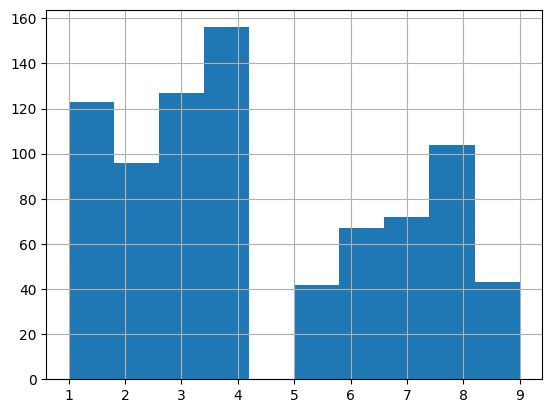

In [9]:
df_ord['EmployeeID'].hist()
df_ord.groupby('EmployeeID').size().idxmax()

,OrderWeek,NetRevenue_1997,NetRevenue_1998
0,1,123279.1840,91569.8850
1,2,121032.5670,94729.0150
2,3,121158.1650,77016.6255
3,4,127683.2125,77854.6465
4,5,123932.0750,99453.6940


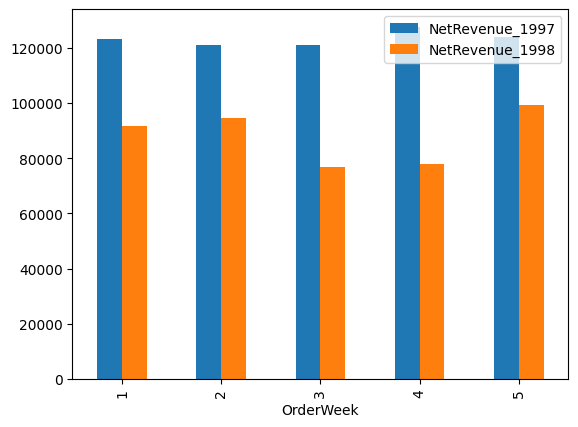

In [51]:
df_odetOrd = df_odet.merge(df_ord)
df_1997 = df_odetOrd[df_odetOrd['OrderDate'].dt.year == 1997][['OrderDate', 'NetRevenue']]
df_1998 = df_odetOrd[df_odetOrd['OrderDate'].dt.year == 1998][['OrderDate', 'NetRevenue']]
df_1997 = df_1997.groupby(df_1997['OrderDate'].dt.weekday).NetRevenue.sum().reset_index()
df_1998 = df_1998.groupby(df_1998['OrderDate'].dt.weekday).NetRevenue.sum().reset_index()
df_1997['OrderDate'] += 1
df_1998['OrderDate'] += 1
df_1997.rename(columns= {'OrderDate': 'OrderWeek', 'NetRevenue': 'NetRevenue_1997'}, inplace=True)
df_1998.rename(columns= {'OrderDate': 'OrderWeek', 'NetRevenue': 'NetRevenue_1998'}, inplace=True)
df_m = df_1997.merge(df_1998)
df_m.plot(kind= 'bar', x = 'OrderWeek')
df_m

<Axes: xlabel='NetRevenue', ylabel='ActualDiscount'>

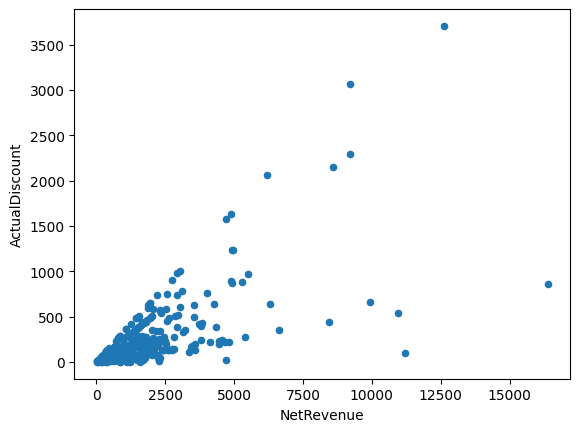

In [59]:
df_h = df_odet.groupby('OrderID').agg({
    'ActualDiscount' : 'sum',
    'NetRevenue' : 'sum'
}).reset_index()
df_h = df_h[df_h['ActualDiscount'] != 0]
df_h.plot(kind= 'scatter', x = 'NetRevenue', y = 'ActualDiscount')

count    89.000000
mean      9.325843
std       5.810991
min       1.000000
25%       5.000000
50%       8.000000
75%      12.000000
max      31.000000
Name: OrderID, dtype: float64

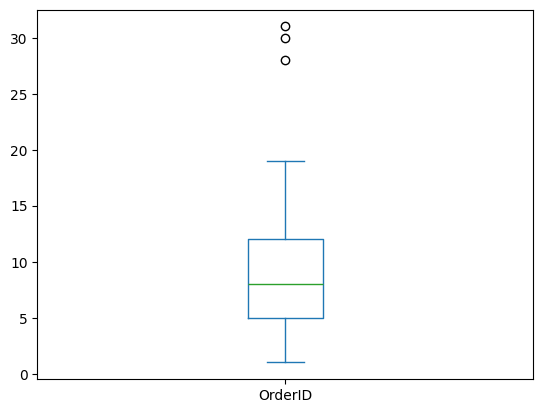

In [63]:
df_h = df_ord.groupby('CustomerID').OrderID.count()
df_h.plot(kind= 'box')
df_h.describe()